In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, roc_curve, auc, classification_report

#OBS: Necessário possuir scikit-learn instalado! Para instalar: pip install -U scikit-learn

In [2]:
#Selecionar arquivo CSV usando seleção de janela do Windows (Janela pode aparecer por baixo da janela do navegador!)
import tkinter as tk
from tkinter import filedialog
root = tk.Tk()
root.withdraw()
caminhoArquivoDados = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])

#Carregar dataset para dataframe
df_original = pd.read_csv(caminhoArquivoDados)

In [3]:
# Criar cópia do dataframe original sem salário
df_no_salary = df_original.copy(deep=True)
df_no_salary = df_no_salary.drop('salary', axis=1)

In [4]:
#################################### ANÁLISE EXPLORATÓRIA ####################################

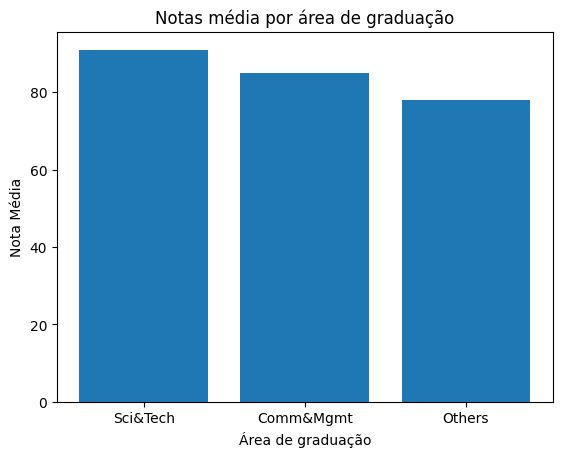

In [5]:
##### Pergunta: Qual área de estudo (tipo de graduação) possui os estudantes com as maiores notas?

# Plotar gráfico de barras de nota média por área de graduação
plt.bar(df_original['degree_t'], df_original['degree_p'])
#plt.bar(df_original['degree_t'], df_original['degree_p'], color=['red', 'green', 'blue'])

# Adicionando título e rótulos dos eixos
plt.title('Notas média por área de graduação')
plt.xlabel('Área de graduação')
plt.ylabel('Nota Média')

# Exibição do gráfico
plt.show()

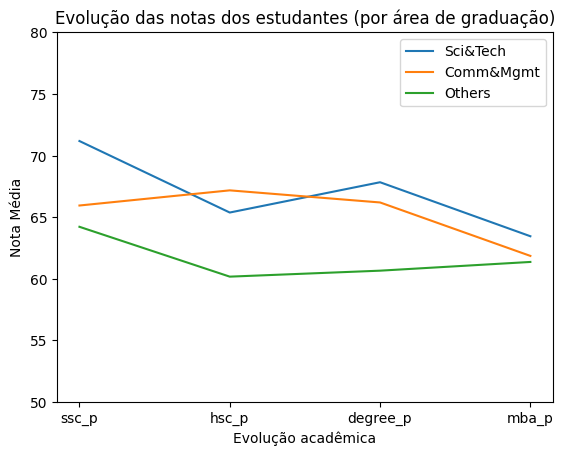

In [6]:
##### Pergunta: Quão consistentes foram os estudantes na sua jornada acadêmica?

# Plotar o gráfico de linha de evolução de notas dos estudantes por área de graduação
dfSciTech = df_original.loc[df_original['degree_t'] == 'Sci&Tech', 
                            ['ssc_p', 'hsc_p', 'degree_p', 'mba_p']]

dfCommMgmt = df_original.loc[df_original['degree_t'] == 'Comm&Mgmt', 
                             ['ssc_p', 'hsc_p', 'degree_p', 'mba_p']]

dfOther = df_original.loc[df_original['degree_t'] == 'Others', 
                          ['ssc_p', 'hsc_p', 'degree_p', 'mba_p']]

plt.plot(dfSciTech.mean(), label='Sci&Tech')
plt.plot(dfCommMgmt.mean(), label='Comm&Mgmt')
plt.plot(dfOther.mean(), label='Others')
plt.ylim(50, 80)

# Adicionar títulos, rótulos dos eixos e a legenda
plt.title('Evolução das notas dos estudantes (por área de graduação)')
plt.xlabel('Evolução acadêmica')
plt.ylabel('Nota Média')
plt.legend()

# Exibir o gráfico
plt.show()

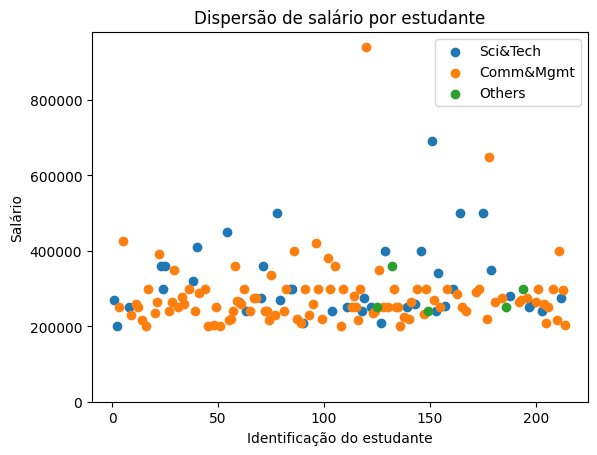

In [7]:
##### Pergunta: Quais os salários de cada estudante e qual sua área de graduação?

# Plotar o gráfico de dispersão de salários por estudante
dfSciTech = df_original.loc[df_original['degree_t'] == 'Sci&Tech', ['salary']]
dfCommMgmt = df_original.loc[df_original['degree_t'] == 'Comm&Mgmt', ['salary']]
dfOther = df_original.loc[df_original['degree_t'] == 'Others', ['salary']]


plt.scatter(df_original.loc[df_original['degree_t'] == 'Sci&Tech', ['sl_no']],
            dfSciTech, 
            label='Sci&Tech')

plt.scatter(df_original.loc[df_original['degree_t'] == 'Comm&Mgmt', ['sl_no']],
            dfCommMgmt, 
            label='Comm&Mgmt')

plt.scatter(df_original.loc[df_original['degree_t'] == 'Others', ['sl_no']],
            dfOther, 
            label='Others')

# Adicionar títulos e rótulos dos eixos
plt.title('Dispersão de salário por estudante')
plt.xlabel('Identificação do estudante')
plt.ylabel('Salário')
plt.legend()

plt.ylim(0, 980000)

plt.show()

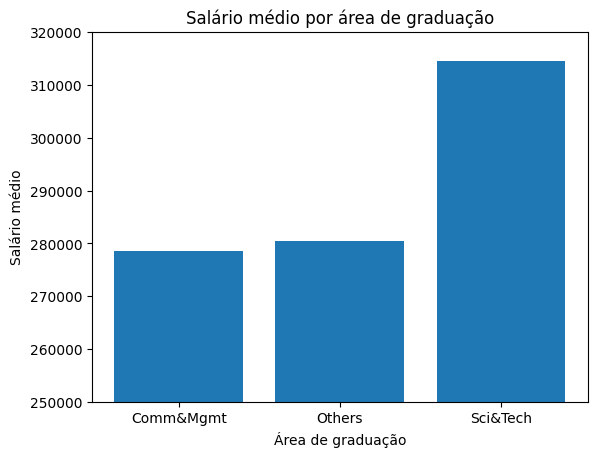

In [8]:
##### Pergunta: Estudantes de qual área de estudo (tipo de graduação) possuem os melhores salários?

# Plotar o gráfico de barras de salário médio por área de graduação
media_salarios = df_original.groupby("degree_t")["salary"].mean()

plt.bar(media_salarios.index, media_salarios)
plt.ylim(250000, 320000)

# Adicionar títulos e rótulos dos eixos
plt.title('Salário médio por área de graduação')
plt.xlabel('Área de graduação')
plt.ylabel('Salário médio')
#print(df_original.groupby("degree_t")["salary"].mean())

# Exibir o gráfico
plt.show()

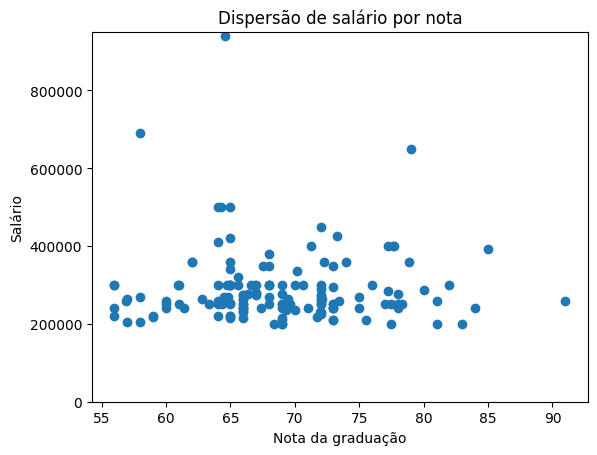

In [9]:
##### Pergunta: Qual a relação entre a nota da GRADUAÇÃO do estudante e o salário a ele oferecido?

# Plotar o gráfico de dispersão de salários por nota
plt.scatter(df_original['degree_p'], df_original['salary'])

# Adicionar títulos e rótulos dos eixos
plt.title('Dispersão de salário por nota')
plt.xlabel('Nota da graduação')
plt.ylabel('Salário')

plt.ylim(0, 950000)

plt.show()

In [10]:
########## Aplicar LabelEncoder nos atributos categóricos ##########

#Selecionar atributos categóricos
colunasAtributosCategoricos = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
df_categoricos = df_no_salary[colunasAtributosCategoricos]

#Aplicar o LabelEncoder nas colunas
label_encoder = LabelEncoder()
for column in colunasAtributosCategoricos:
    df_categoricos.loc[:, column] = label_encoder.fit_transform(df_categoricos[column])

#Substituir as colunas originais pelas colunas codificadas (como inteiros ao invés de objetos)
df_no_salary[colunasAtributosCategoricos] = df_categoricos.astype('int64')

              precision    recall  f1-score   support

           0       0.71      0.63      0.67        19
           1       0.85      0.89      0.87        46

    accuracy                           0.82        65
   macro avg       0.78      0.76      0.77        65
weighted avg       0.81      0.82      0.81        65

Number of mislabeled points out of a total 65 points : 12


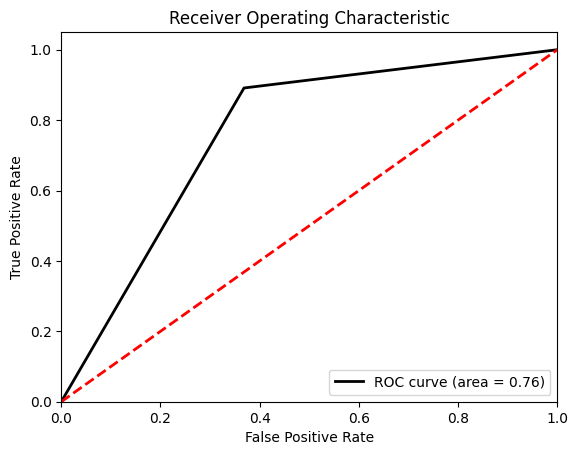

In [11]:
################## TREINAR MODELO DE CLASSIFICAÇÃO NAIVE BAYES COM "df_no_salary" ##################
X_train, X_test, y_train, y_test = train_test_split(df_no_salary.drop('status', axis=1), df_no_salary['status'], test_size=0.3, random_state=0)

# Criar objeto do tipo GaussianNB
gnb = GaussianNB()

# Treinar o modelo com os dados de treino
gnb.fit(X_train, y_train)

# Fazer a previsão do status dos dados de teste
y_pred = gnb.predict(X_test)

# Exibir um relatório de classificação
print(classification_report(y_test, y_pred))
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

# Calcular a curva ROC e a AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [12]:
#################### Criar cópia do dataframe original sem status ####################

df_no_status = df_original.copy(deep=True)
df_no_status = df_no_status.drop('status', axis=1)

#Selecionar atributos categóricos
colunasAtributosCategoricos = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
df_categoricos = df_no_status[colunasAtributosCategoricos]

#Aplicar o LabelEncoder nas colunas
label_encoder = LabelEncoder()
for column in colunasAtributosCategoricos:
    df_categoricos.loc[:, column] = label_encoder.fit_transform(df_categoricos[column])

#Substituir as colunas originais pelas colunas codificadas (como inteiros ao invés de objetos)
df_no_status[colunasAtributosCategoricos] = df_categoricos.astype('int64')
df_no_status

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,NaN
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,204000.0


In [13]:
#################### Treinar um modelo de regressão linear múltipla ####################

# Criar dataframe auxiliar sem linhas com salarios faltantes
df_no_status_aux = df_no_status.copy(deep=True)
df_no_status_aux = df_no_status_aux.dropna(subset=['salary'])

# Dividir o dataframe em recursos (X) e alvo (y)
X = df_no_status_aux.drop(['salary'], axis=1)
y = df_no_status_aux['salary']

# Treinar o modelo de regressão linear múltipla
model = LinearRegression()
model.fit(X, y)

# Criar dataframe com amostras que não possuem valores de salário conhecidos
df_no_salary2 = df_no_status[df_no_status['salary'].isnull()].drop(['salary'], axis=1)

# Fazer previsões usando o modelo treinado para as amostras sem valores de salário conhecidos
predicted_salary = model.predict(df_no_salary2).astype(int)

# Adicionar os valores previstos ao dataframe df_no_status sem o atributo salary 
df_no_status.loc[df_no_status['salary'].isnull(), 'salary'] = predicted_salary
df_no_status

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
0,1,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,270000.0
1,2,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,200000.0
2,3,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,250000.0
3,4,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,317262.0
4,5,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,400000.0
211,212,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,275000.0
212,213,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,295000.0
213,214,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,204000.0


In [14]:
#################### Copiar os atributos salary de df_no_status para df_original ####################

df_original['salary'] = df_no_status['salary']

# Copiar apenas onde df_original for nulo
#df_original.loc[df_original['salary'].isnull(), 'salary'] = df_no_status.loc[df_no_status['salary'].notnull(), 'salary']

              precision    recall  f1-score   support

           0       0.65      0.68      0.67        19
           1       0.87      0.85      0.86        46

    accuracy                           0.80        65
   macro avg       0.76      0.77      0.76        65
weighted avg       0.80      0.80      0.80        65

Number of mislabeled points out of a total 65 points : 13


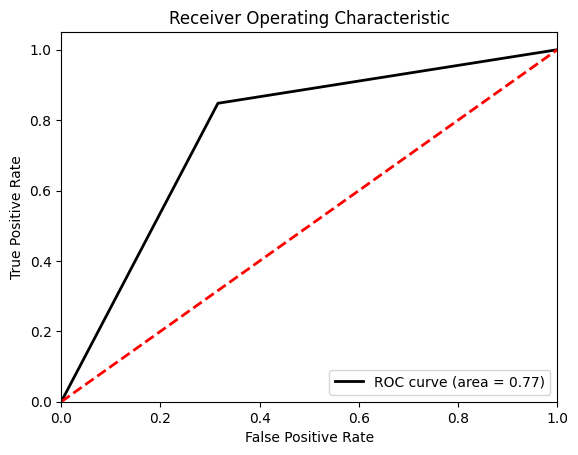

In [15]:
####################### Treinear o modelo de classificação Naive Bayes agora com df_original #########################

## Aplicar LabelEncoder nos atributos categóricos ##

#Selecionar atributos categóricos
colunasAtributosCategoricos = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
df_categoricos = df_original[colunasAtributosCategoricos]

#Aplicar o LabelEncoder nas colunas
label_encoder = LabelEncoder()
for column in colunasAtributosCategoricos:
    df_categoricos.loc[:, column] = label_encoder.fit_transform(df_categoricos[column])

#Substituir as colunas originais pelas colunas codificadas (como inteiros ao invés de objetos)
df_original[colunasAtributosCategoricos] = df_categoricos.astype('int64')


# Dividir dataframe para treinamento

X_train, X_test, y_train, y_test = train_test_split(df_original.drop('status', axis=1), df_original['status'], test_size=0.3, random_state=0)

# Criar objeto do tipo GaussianNB
gnb = GaussianNB()

# Treinar o modelo com os dados de treino
gnb.fit(X_train, y_train)

# Fazer a previsão do status dos dados de teste
y_pred = gnb.predict(X_test)

# Exibir um relatório de classificação
print(classification_report(y_test, y_pred))
print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

# Calcular a curva ROC e a AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='black', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()